# Problem Statement

### We are supposed to predict the amount based on distance -> lat, longtitude

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Requirements

unqiue_id = not required,
Amount = Dependent Variable, y -> Regression, Independent Variable = date time pickup, lat, long, no.passengers

Models to be used in the Project ->
LinearRegression, DecisionTreeRegression, BaggingRegressor, AdaBoostregressor, GradientBoostingregressor, RandomForestRegressor

In [116]:
df = pd.read_csv('TaxiFare.csv')
df.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [117]:
df.shape

(50000, 8)

In [118]:
df.drop(['unique_id'], axis=1, inplace=True)

In [119]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## Data Pre-Processing

Here, we have to check for null values, edit the data and structure the data for building the machine learning models.

In [120]:
# checking the null values if any
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [121]:
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [122]:
# this is to convert the datetime column into date time object
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])
df['date_time_of_pickup']

0       2009-06-15 17:26:21+00:00
1       2010-01-05 16:52:16+00:00
2       2011-08-18 00:35:00+00:00
3       2012-04-21 04:30:42+00:00
4       2010-03-09 07:51:00+00:00
                   ...           
49995   2013-06-12 23:25:15+00:00
49996   2015-06-22 17:19:18+00:00
49997   2011-01-30 04:53:00+00:00
49998   2012-11-06 07:09:00+00:00
49999   2010-01-13 08:13:14+00:00
Name: date_time_of_pickup, Length: 50000, dtype: datetime64[ns, UTC]

In [123]:
# date time column is been converted into date time object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [124]:
# creating the separate columns for the year, month, day, hours and minutes
df['year'] = df['date_time_of_pickup'].dt.year
df['month'] = df['date_time_of_pickup'].dt.month
df['day'] = df['date_time_of_pickup'].dt.day
df['hours'] = df['date_time_of_pickup'].dt.hour
df['minutes'] = df['date_time_of_pickup'].dt.minute

In [125]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hours,minutes
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51


### Univariate Analysis

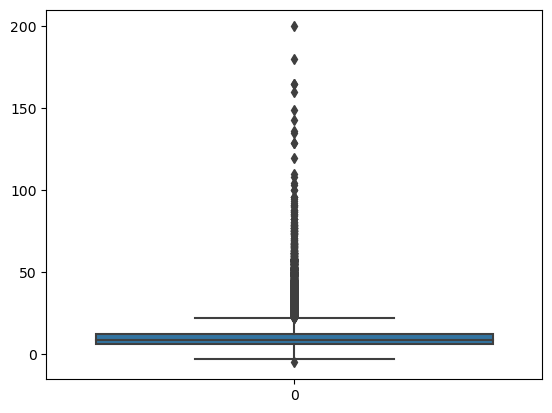

In [126]:
sns.boxplot(df['amount'])
plt.show()

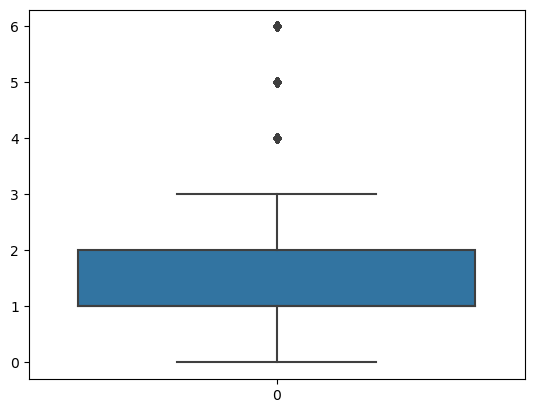

In [127]:
sns.boxplot(df['no_of_passenger'])
plt.show()

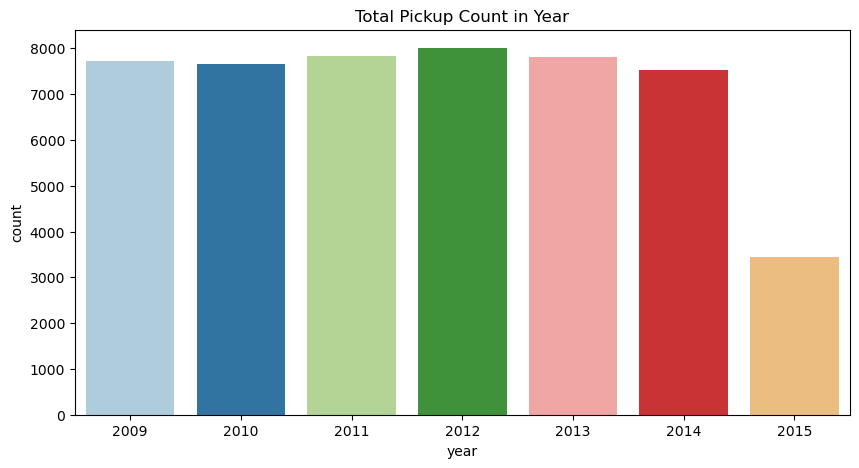

In [128]:
plt.figure(figsize = (10,5))
sns.countplot(x='year', data = df, palette = 'Paired')
plt.title('Total Pickup Count in Year')
plt.show()

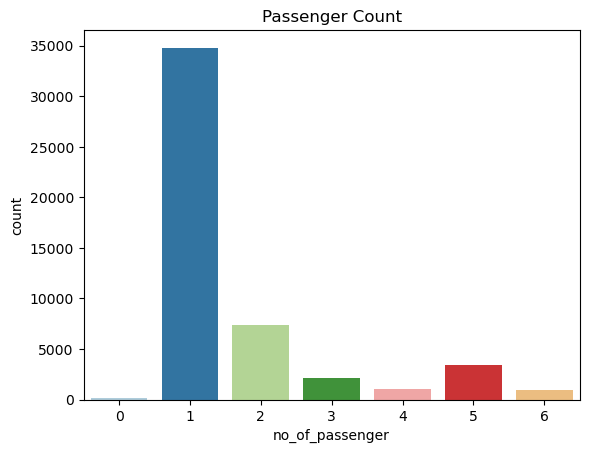

In [129]:
sns.countplot(x='no_of_passenger', data = df, palette = 'Paired')
plt.title('Passenger Count')
plt.show()

### Treating outliers

Minimum fare amount is negative

Minimum passenger count is 0

In [130]:
# putting the right conditions to treat the outliers
df = df[(df['no_of_passenger'] > 0) & (df['amount'] > 2.5)]

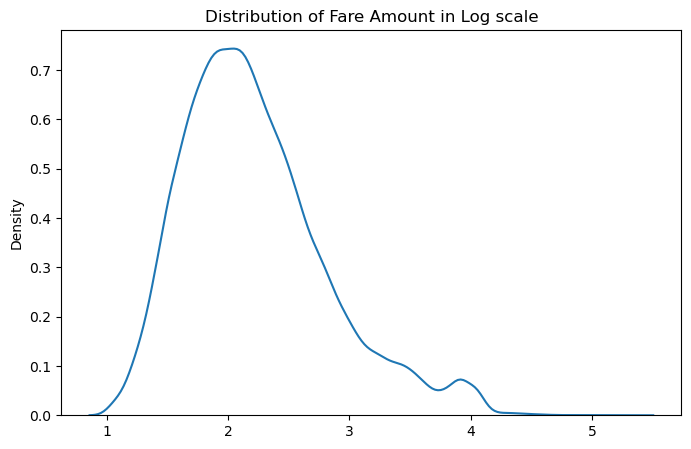

In [131]:
# finally the data for fare amount has been normalized
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['amount'].values)).set_title("Distribution of Fare Amount in Log scale");

## Calculating the distance between 2 Geolocations

### Introducing Harversine Distance

The haversine formula determines the great-circle distance between two points on sphere given their longitudes and latitudes

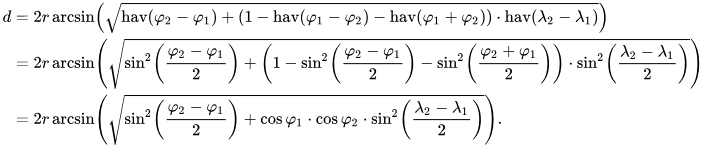

In [132]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

df['distance_in_miles'] = distance(df.latitude_of_pickup, df.longitude_of_pickup, \
                               df.latitude_of_dropoff, df.longitude_of_dropoff)

df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hours,minutes,distance_in_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,1.242218


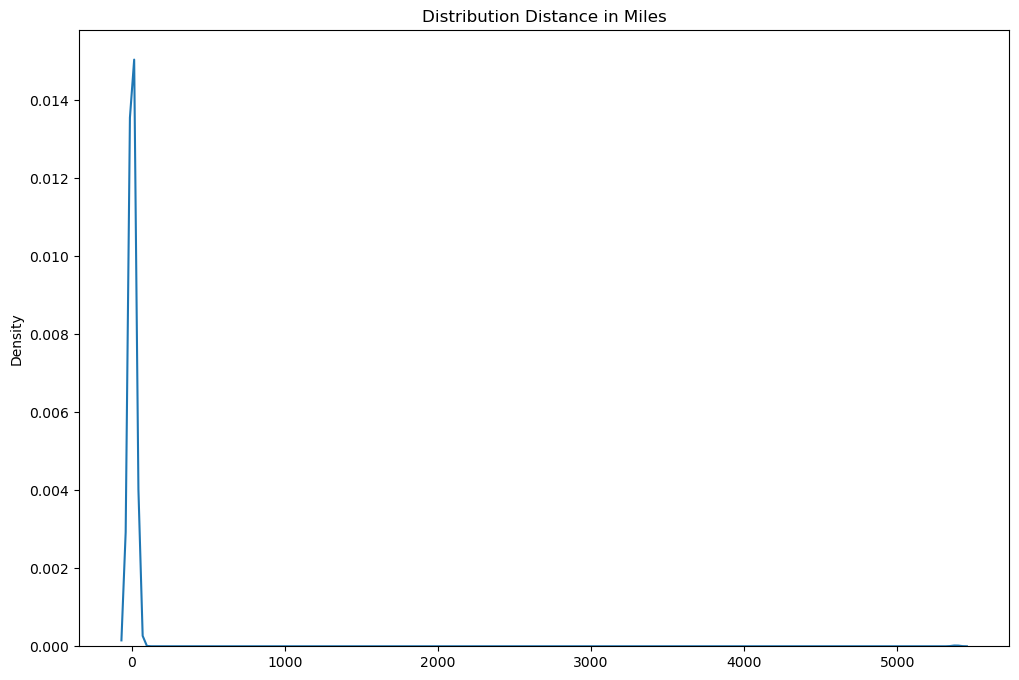

In [133]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['distance_in_miles'].values).set_title('Distribution Distance in Miles')
plt.show()

Since we have calculated distance so now we can drop coordinates columns to proceed for machine learning models

We can remove date_time_of_pickup column as well, as we have taken out the required details from that

In [134]:
df.drop(['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'date_time_of_pickup'], axis = 1, inplace = True)

In [135]:
df.head()

,amount,no_of_passenger,year,month,day,hours,minutes,distance_in_miles
0,4.5,1,2009,6,15,17,26,0.640487
1,16.9,1,2010,1,5,16,52,5.250670
2,5.7,2,2011,8,18,0,35,0.863411
3,7.7,1,2012,4,21,4,30,1.739386
4,5.3,1,2010,3,9,7,51,1.242218


In [145]:
print(df.no_of_passenger.unique())
print(df.year.unique())
print(df.month.unique())
print(df.distance_in_miles.unique())

[1 2 3 6 5 4]
[2009 2010 2011 2012 2013 2014 2015]
[ 6  1  8  4  3 11 12  9  7  2  5 10]
[0.64048702 5.25066965 0.86341096 ... 0.54351698 1.40634079 0.41336409]


The Data looks clean so now we can move ahead with machine learning model building

## Machine Learning Model 

Amount is a dependent variable here -> y

As it is a numerical data so, regression model will be used to train and test the data

### Split Data

In [146]:
# Independent Variable
X = df.drop(['amount'], axis = 1)
# Dependent variable
y = df[['amount']]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

### Linear Regression

In [149]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.017304177340738747

In [150]:
lr.score(X_train, y_train)

0.017814688576680116

### k-fold cross validation

In [152]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.01829936, 0.02312103, 0.01681932, 0.01737899, 0.01652649])

It is clear that Linear Regression is not giving good accuracy. Therefore, we need to try more regressor models to get the best results

### Grid Search CV

Through this we will use different hyper parameters and regressor models to figure out which model works the best for this dataset

In [156]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model(X,y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'gini'],
                'splitter': ['best', 'random'],
                'max_depth': [1, 2, 3, 4, 5]
            }
        },
        'bagging': {
            'model': BaggingRegressor(),
            'params': {
                'n_estimators': [10, 50, 100, 150],
                'max_features': [1, 2, 3, 4, 5]
            }
        },
        'ada': {
            'model': AdaBoostRegressor(),
            'params': {
                'n_estimators': [10, 20, 40, 60, 80],
                'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                'loss': ['linear']
            }
        },
        'gradient': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [10, 50, 100, 120],
                'random_state': [42, 50, 60]
            }
        },
        'forest': {
            'model': RandomForestRegressor(),
            'params': {
                'random_state': [3, 8, 10, 12],
                'max_features': [2, 4, 6, 8],
                'max_depth': [1, 2, 3, 4, 5]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(X,y)

,model,best_score,best_params
0,decision_tree,0.735478,"{'criterion': 'friedman_mse', 'max_depth': 5, ..."
1,bagging,0.677690,"{'max_features': 5, 'n_estimators': 150}"
2,ada,0.687437,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es..."
3,gradient,0.751581,"{'n_estimators': 100, 'random_state': 42}"
4,forest,0.742951,"{'max_depth': 5, 'max_features': 8, 'random_st..."


As we can see that GradientBoostingRegressor is giving the best result out of all the models. Hence we will be using this model to predict the fare amount

In [184]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
print(gbr.score(X_test, y_test))
print(gbr.score(X_train, y_train))

0.7827787121660505
0.7763622649853587


## Actual vs Prediction

In [170]:
# This is actual fare amount column.
y_test

,amount
535,8.0
14276,6.5
39581,13.0
40819,4.1
38409,19.0
...,...
11714,4.9
25245,6.5
963,7.7
44215,12.0


In [180]:
# I was encountering dimenionality error, hence I tried to flatten the dimensions with this method.
y_test_array = y_test.values.flatten()

In [179]:
predictions = gbr.predict(X_test)

Now, we have to check whether the prediction is close to the actual fare amount or not. For that I am creating a data frame to compare actual vs predicted.

In [185]:
df_check = pd.DataFrame({'Actual': y_test_array, 'Predicted': predictions})
df_check.sample(20)
# As we can see that model is working fine, the predicted fare amount are almost close to the actual fare amount.

,Actual,Predicted
9053,7.40,8.628423
4592,9.70,6.808456
10330,7.30,7.205874
11970,6.10,7.242530
4783,8.00,10.525894
10665,4.90,6.453298
929,10.50,10.478594
2564,4.90,4.991576
13191,5.50,6.221801
1695,10.90,8.821634
